In [8]:
from ai_tools import DataGenerator
from ai_tools.displays import plot_history
from ai_tools.models import build_conv2d_example
import numpy as np
from random import shuffle
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from typing import List
from utils.helpers import load_data, Data
import shutil
import os

['proc', 'usr', 'root', 'var', 'tmp', 'home', 'opt', 'bin', 'lib32', 'lib64', 'libx32', 'sys', 'run', 'sbin', 'mnt', 'media', 'etc', 'dev', 'srv', 'boot', 'lib', 'tensorboard-logs', 'models', 'data-sets', 'pickled-data', 'notebook', '.dockerenv', 'tf', '.local', 'NGC-DL-CONTAINER-LICENSE']


In [3]:
# Create train and validation generators.
train_data_generator = DataGenerator.from_path_to_audio('../data-sets/small_nsynth/train', batch_size=64)
val_data_generator = DataGenerator.from_path_to_audio('../data-sets/processed_nsynth/validation', batch_size=64)

# Build model.
model: Model = build_conv2d_example(train_data_generator.n_classes)

# Train model.
history = model.fit(
    train_data_generator,
    validation_data=val_data_generator,
    steps_per_epoch=64,
    validation_steps=64,
    epochs=5,
    verbose=True
)

FileNotFoundError: [Errno 2] No such file or directory: '/data-sets/small_nsynth/train'

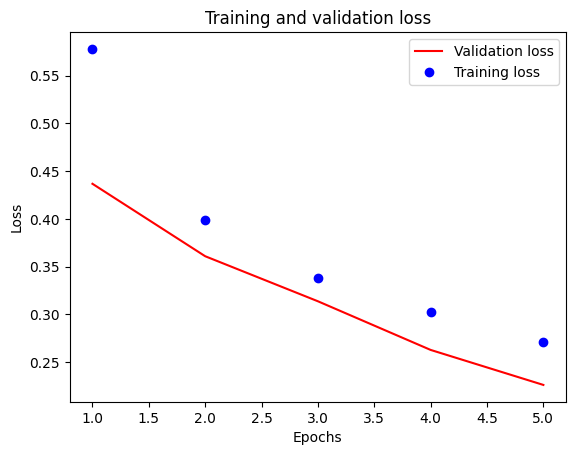

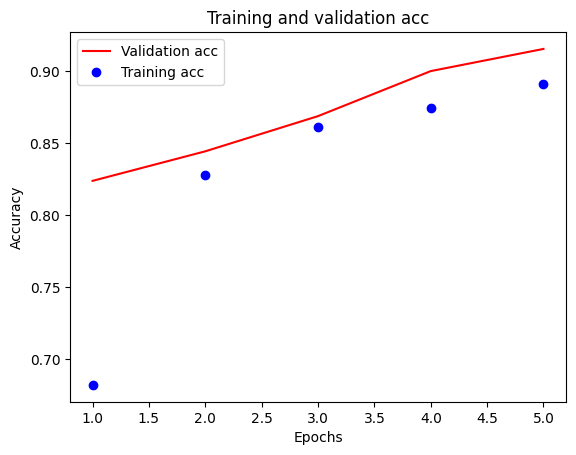

In [4]:
plot_history(history)

In [5]:
test_data: List[Data] = load_data('../data-sets/small_nsynth/test')
shuffle(test_data)

X_test: np.ndarray = np.stack([data.raw_audio.reshape(-1, 1) for data in test_data])
y_test: np.ndarray = np.stack([data.label for data in test_data])
y_test = to_categorical(y_test)

model.evaluate(X_test, y_test)
X_test.shape

56/56 [==============================] - 1s 5ms/step - loss: 3.6603 - accuracy: 0.1472


(1773, 22050, 1)